# Pandas For data Science: Plotting a Time Series

Based on Pandas Practices by Kevin Markham at PYCON CLEVELAND 2018

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Reading Datastes

   - Dataset 1: Rhode Island Dataset from [Stanford Open Policing Project](https://openpolicing.stanford.edu/)

In [2]:
ri = pd.read_csv('police.csv')
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


### Exercise 8: How does drug activity change by time of day?

___First Way___

In [3]:
# Create stop_datetime column concatenating stop_date and stop_time

combined = ri['stop_date'].str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

In [4]:
ri.dtypes

stop_date                     object
stop_time                     object
county_name                  float64
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
stop_datetime         datetime64[ns]
dtype: object

In [5]:
# How is drugs_related_stop column?

ri['drugs_related_stop'].value_counts()

False    90926
True       815
Name: drugs_related_stop, dtype: int64

In [6]:
drugs_df = ri[ri['drugs_related_stop'] == True]
drugs_df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime
40,2005-10-01,00:00,NaN,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Arrest Driver,True,16-30 Min,True,2005-10-01 00:00:00
41,2005-10-01,00:00,NaN,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Citation,False,30+ Min,True,2005-10-01 00:00:00
118,2005-10-04,01:20,NaN,M,1956.0,49.0,White,Other Traffic Violation,Moving violation,True,Incident to Arrest,Arrest Driver,True,30+ Min,True,2005-10-04 01:20:00
139,2005-10-05,00:20,NaN,M,1980.0,25.0,Black,Equipment/Inspection Violation,Equipment,True,"Probable Cause,Reasonable Suspicion",Arrest Driver,True,16-30 Min,True,2005-10-05 00:20:00
219,2005-10-07,23:30,NaN,M,1986.0,19.0,White,Suspicious Person,Other,True,Probable Cause,Arrest Passenger,True,16-30 Min,True,2005-10-07 23:30:00


In [7]:
drugs_df['stop_datetime'].dt.hour.value_counts(normalize= True).sort_index()

0     0.126380
1     0.073620
2     0.056442
3     0.024540
4     0.003681
5     0.001227
6     0.012270
7     0.018405
8     0.017178
9     0.052761
10    0.051534
11    0.050307
12    0.019632
13    0.061350
14    0.053988
15    0.038037
16    0.026994
17    0.019632
18    0.026994
19    0.036810
20    0.033129
21    0.024540
22    0.057669
23    0.112883
Name: stop_datetime, dtype: float64

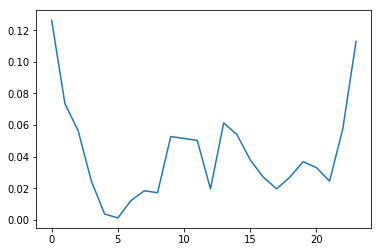

In [8]:
# In this DF i've removed all the falses values

drugs_df['stop_datetime'].dt.hour.value_counts(normalize= True).sort_index().plot()

___Second Way___

In [9]:
ri['drugs_related_stop'].mean()

0.008883705213590434

In [10]:
ri.groupby(ri['stop_datetime'].dt.hour)['drugs_related_stop'].mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

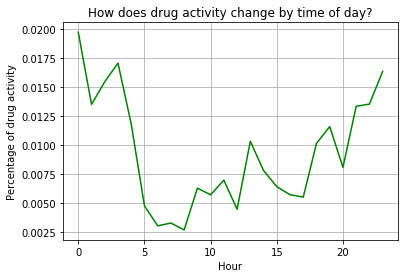

In [11]:
ri.groupby(ri['stop_datetime'].dt.hour)['drugs_related_stop'].mean().plot(kind='line',c='g')
plt.grid(True)
plt.xlabel('Hour')
plt.ylabel('Percentage of drug activity')
plt.title('How does drug activity change by time of day?')
plt.show()